<img src="resources/harvey.gif" />

## Dependencies

In [10]:
# Dependencies and Setup

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib.dates import DateFormatter
import scipy

## S&P1500 import and cleaning

In [11]:
# Load S&P file
sp1500 = "resources/S&P1500_Sector_All.csv"
sp1500 = pd.read_csv(sp1500) 

# Display the data table for preview
sp1500.head()

,Date,(INDEX) S&P Composite 1500 / Consumer Discretionary - SEC - Total Return,(INDEX) S&P Composite 1500 / Communication Services -SEC - Total Return,(INDEX) S&P Composite 1500 / Consumer Staples - SEC - Total Return,(INDEX) S&P Composite 1500 / Energy - SEC - Total Return,(INDEX) S&P Composite 1500 / Financials - SEC - Total Return,(INDEX) S&P Composite 1500 / Health Care - SEC - Total Return,(INDEX) S&P Composite 1500 / Industrials - SEC - Total Return,(INDEX) S&P Composite 1500 / Information Technology - SEC - Total Return,(INDEX) S&P Composite 1500 / Materials - SEC - Total Return,(INDEX) S&P Composite 1500 Real Estate - SEC - Total Return,(INDEX) S&P Composite 1500 / Utilities - SEC - Total Return
0,12/30/2013,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,12/31/2013,0.37,-0.08,-0.03,0.92,0.34,0.00,0.43,0.71,0.26,-0.49,0.23
2,1/1/2014,0.37,-0.08,-0.03,0.92,0.34,0.00,0.43,0.71,0.26,-0.49,0.23
3,1/2/2014,-0.16,-0.68,-1.12,-0.44,-0.23,-0.58,-0.87,-0.36,-0.48,-0.66,-1.34
4,1/3/2014,-0.35,-1.31,-1.27,-0.69,0.39,-0.35,-0.55,-0.71,-0.58,0.02,-1.57


In [12]:
# Fix columns with slightly different formatting, to make all uniform (i.e., Communication Services and Real Estate cols)
sp1500.columns = sp1500.columns.str.replace('-SEC','- SEC').str.replace('1500 /','1500')

# Delete all special characters by replacing with empty string
sp1500.columns = sp1500.columns.str.replace(r'(','').str.replace(r')','')

# Remove remaining text we don't want
sp1500.columns = sp1500.columns.str.replace('INDEX S&P Composite 1500 ','').str.replace(' - SEC - Total Return ','')
sp1500.columns = sp1500.columns.str.replace('   ','') # replaces 3 back to back spaces left over after removing other text

# Replace space with underscore for ease of referencing column later on
sp1500.columns = sp1500.columns.str.replace(' ','_')

# Reformat date column, so we can filter on it later
sp1500['Date'] = pd.to_datetime(sp1500['Date'])

# Display the data table to see new column headers
sp1500.head()

,Date,Consumer_Discretionary,Communication_Services,Consumer_Staples,Energy,Financials,Health_Care,Industrials,Information_Technology,Materials,Real_Estate,Utilities
0,2013-12-30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2013-12-31,0.37,-0.08,-0.03,0.92,0.34,0.00,0.43,0.71,0.26,-0.49,0.23
2,2014-01-01,0.37,-0.08,-0.03,0.92,0.34,0.00,0.43,0.71,0.26,-0.49,0.23
3,2014-01-02,-0.16,-0.68,-1.12,-0.44,-0.23,-0.58,-0.87,-0.36,-0.48,-0.66,-1.34
4,2014-01-03,-0.35,-1.31,-1.27,-0.69,0.39,-0.35,-0.55,-0.71,-0.58,0.02,-1.57


## Hurricane data import and cleaning

In [13]:
# Load Hurricane data
hurricanes = "resources/Hurricane_data_all.csv"
hurricanes = pd.read_csv(hurricanes) 

# Reformat date columns, so we can use them later as part of formula
hurricanes['Active_date'] = pd.to_datetime(hurricanes['Active_date'])
hurricanes['End_date'] = pd.to_datetime(hurricanes['End_date'])

# Display the data table for preview
hurricanes.head(20)

,Name,Year,Active_date,End_date,Days,Main_state,Highest_Category,Central_pressure,Max_wind,Damage_million,Direct_deaths
0,Arthur,2014,2014-07-01,2014-07-05,5,NC,2,973,85,17,1
1,Hermine,2016,2016-08-28,2016-09-03,7,FL,1,981,80,550,4
2,Matthew,2016,2016-09-28,2016-10-09,12,FL,5,934,165,"15,090",586
3,Harvey,2017,2017-08-17,2017-09-01,16,TX,4,937,130,"125,000",68
4,Irma,2017,2017-08-30,2017-09-12,14,FL,5,914,180,"64,760",52
5,Nate,2017,2017-10-04,2017-10-09,6,LA,1,981,90,787,46
6,Chris,2018,2018-07-06,2018-07-12,7,NC,2,969,105,0,1
7,Florence,2018,2018-08-31,2018-09-17,18,SC,4,939,140,"17,900",30
8,Michael,2018,2018-10-07,2018-10-12,6,FL,4,919,155,"14,600",60


## S&P1500 data during 2014 to 2018 hurricane seasons

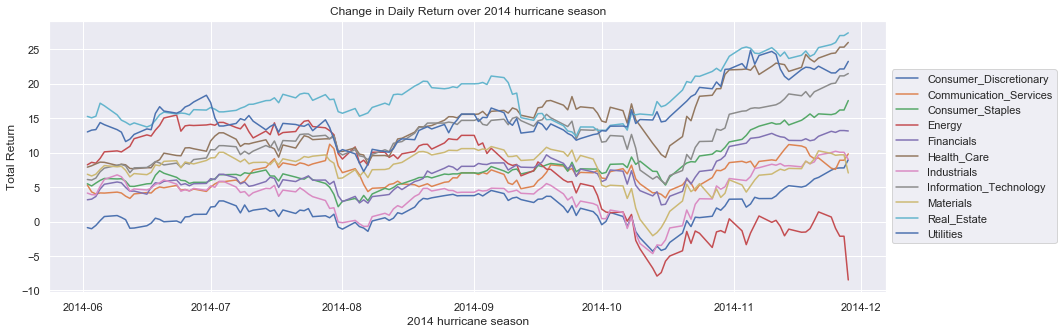

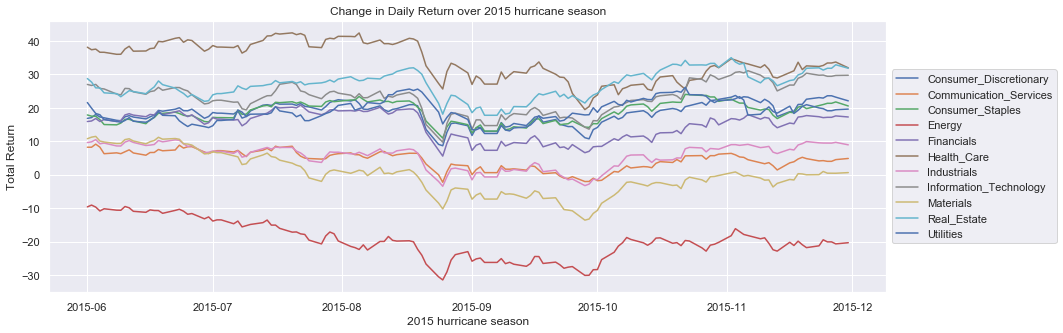

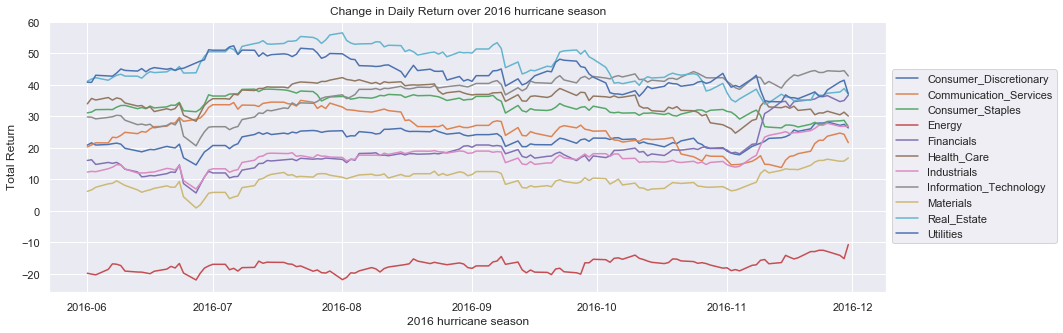

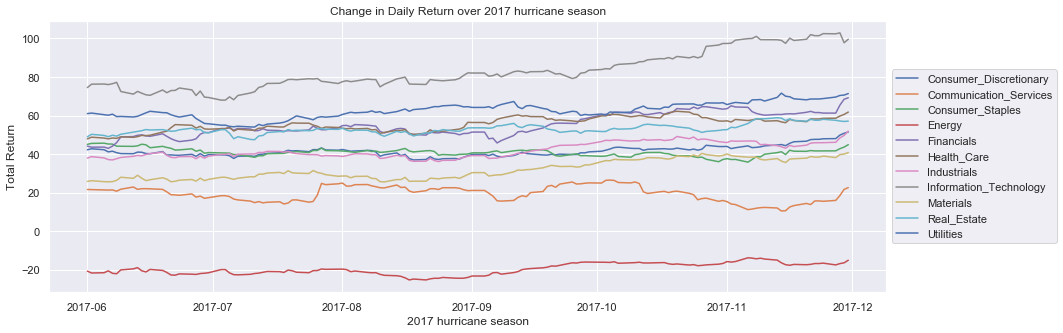

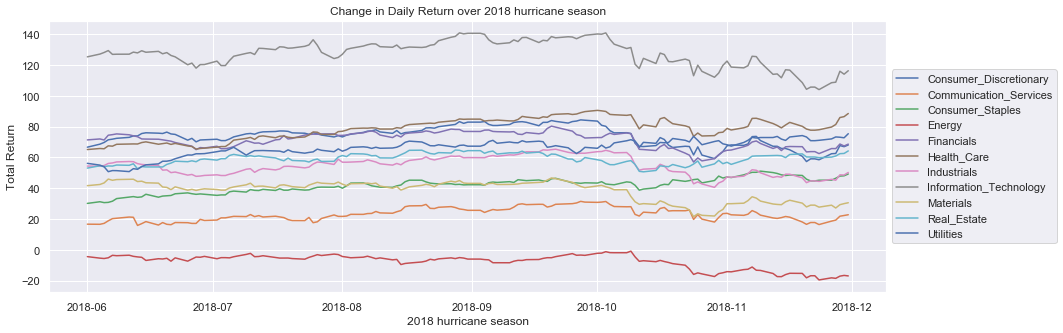

In [35]:
#2014
# Filter on dates and reset index
sp1500_2014 = sp1500[(sp1500['Date'] >= '6/1/2014') & (sp1500['Date'] <= '11/30/2014')]
sp1500_2014 = sp1500_2014.reset_index(drop=True)

# Plot 11 sectors
for x in range(1, 12):
    plt.plot(sp1500_2014['Date'], sp1500_2014.iloc[:,x])
plt.legend()
plt.ylabel('Total Return')
plt.xlabel('2014 hurricane season')
plt.title('Change in Daily Return over 2014 hurricane season')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.rcParams["figure.figsize"] = (15,5)
plt.show()

#2015
# Filter on dates and reset index
sp1500_2015 = sp1500[(sp1500['Date'] >= '6/1/2015') & (sp1500['Date'] <= '11/30/2015')]
sp1500_2015 = sp1500_2015.reset_index(drop=True)

# Plot 11 sectors
for x in range(1, 12):
    plt.plot(sp1500_2015['Date'], sp1500_2015.iloc[:,x])
plt.legend()
plt.ylabel('Total Return')
plt.xlabel('2015 hurricane season')
plt.title('Change in Daily Return over 2015 hurricane season')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.rcParams["figure.figsize"] = (15,5)
plt.show()

#2016
# Filter on dates and reset index
sp1500_2016 = sp1500[(sp1500['Date'] >= '6/1/2016') & (sp1500['Date'] <= '11/30/2016')]
sp1500_2016 = sp1500_2016.reset_index(drop=True)

# Plot 11 sectors
for x in range(1, 12):
    plt.plot(sp1500_2016['Date'], sp1500_2016.iloc[:,x])
plt.legend()
plt.ylabel('Total Return')
plt.xlabel('2016 hurricane season')
plt.title('Change in Daily Return over 2016 hurricane season')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.rcParams["figure.figsize"] = (15,5)
plt.show()

#2017
# Filter on dates and reset index
sp1500_2017 = sp1500[(sp1500['Date'] >= '6/1/2017') & (sp1500['Date'] <= '11/30/2017')]
sp1500_2017 = sp1500_2017.reset_index(drop=True)

# Plot 11 sectors
for x in range(1, 12):
    plt.plot(sp1500_2017['Date'], sp1500_2017.iloc[:,x])
plt.legend()
plt.ylabel('Total Return')
plt.xlabel('2017 hurricane season')
plt.title('Change in Daily Return over 2017 hurricane season')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.rcParams["figure.figsize"] = (15,5)
plt.show()

#2018
# Filter on dates and reset index
sp1500_2018 = sp1500[(sp1500['Date'] >= '6/1/2018') & (sp1500['Date'] <= '11/30/2018')]
sp1500_2018 = sp1500_2018.reset_index(drop=True)

# Plot 11 sectors
for x in range(1, 12):
    plt.plot(sp1500_2018['Date'], sp1500_2018.iloc[:,x])
plt.legend()
plt.ylabel('Total Return')
plt.xlabel('2018 hurricane season')
plt.title('Change in Daily Return over 2018 hurricane season')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.rcParams["figure.figsize"] = (15,5)
plt.show()

## Visualizing combined S&P1500 and hurricane data

### 2015 control year (no hurricanes)

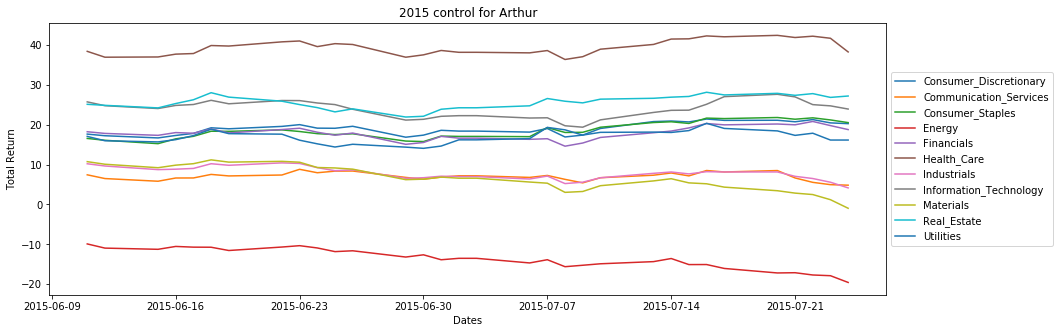

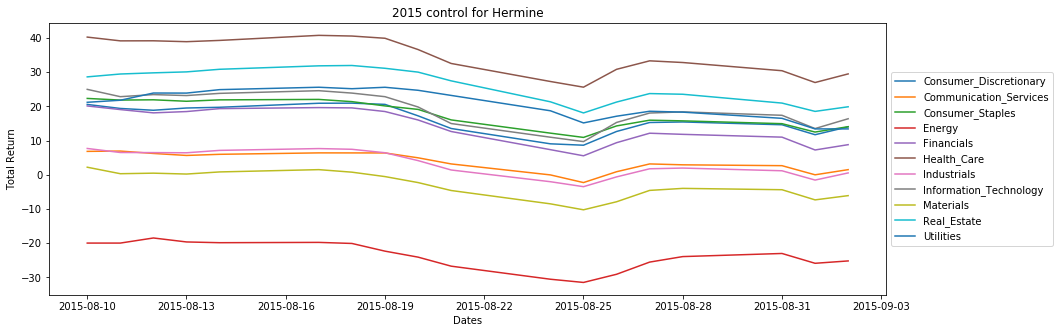

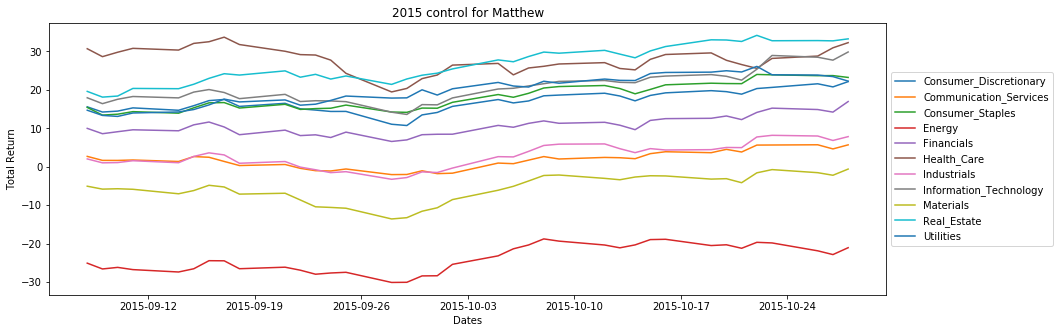

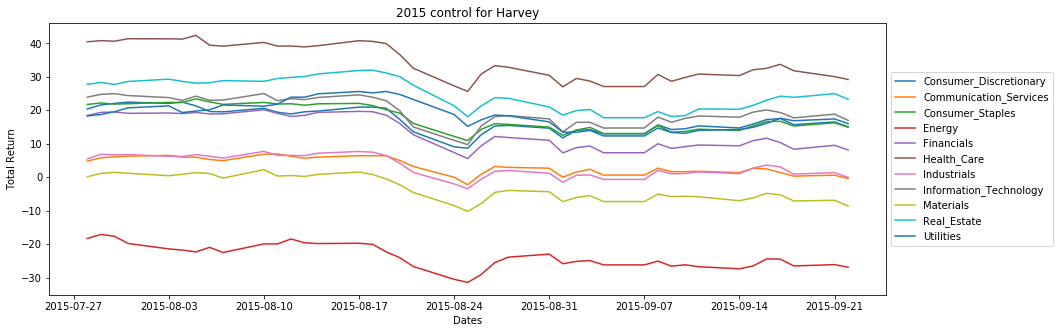

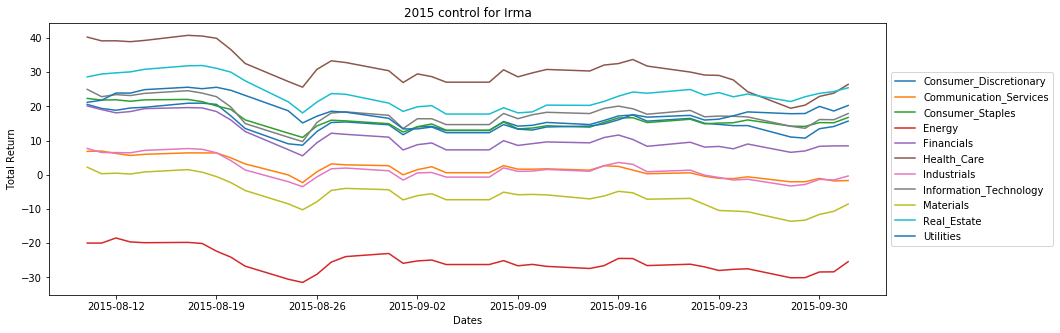

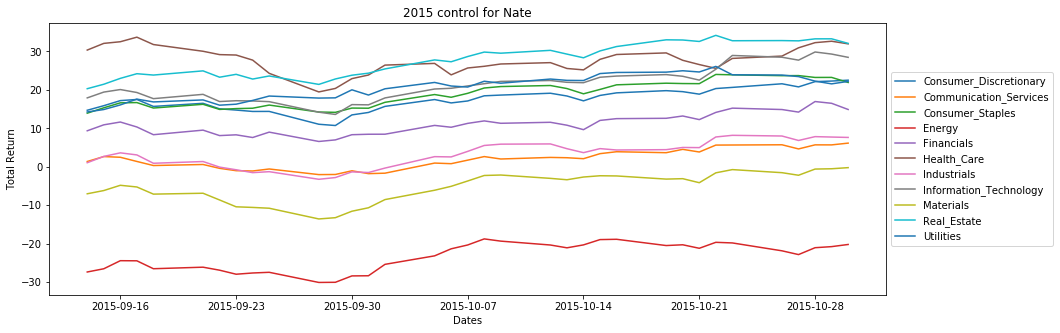

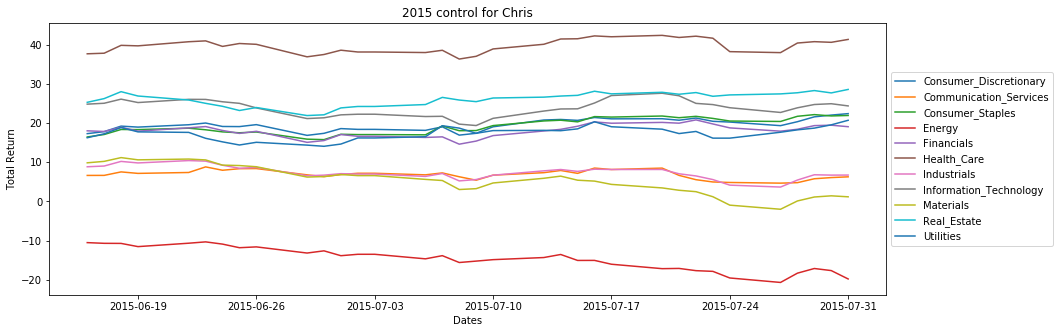

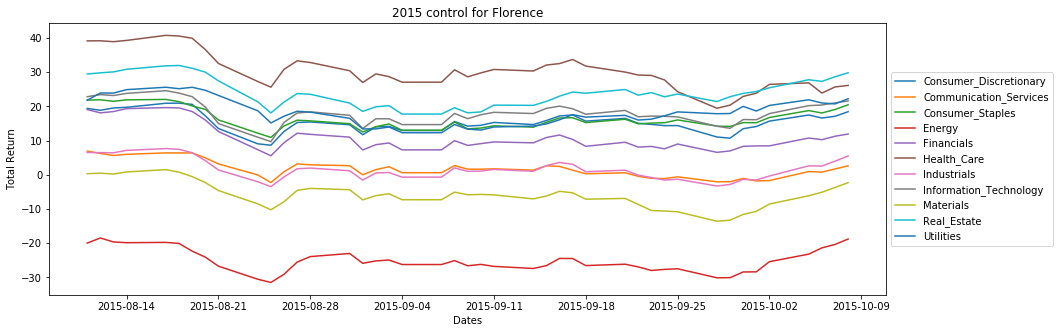

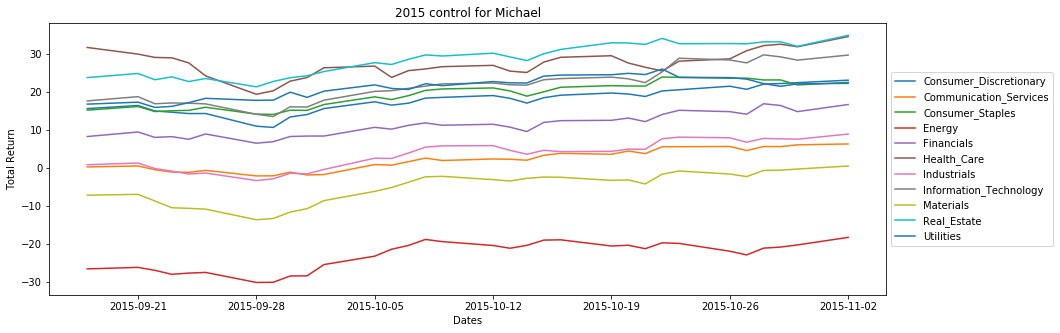

In [15]:
# Create control tables for 2015
# Same weeks as Arthur, but 2015
sp1500_arthur = sp1500[(sp1500['Date'] > '6/10/2015') & (sp1500['Date'] <= '7/25/2015')]
sp1500_arthur = sp1500_arthur.reset_index(drop = True)

# Same weeks as Hermine, but 2015
sp1500_hermine = sp1500[(sp1500['Date'] > '8/8/2015') & (sp1500['Date'] <= '9/2/2015')]
sp1500_hermine = sp1500_hermine.reset_index(drop = True)

# Same weeks as Matthew, but 2015
sp1500_matthew = sp1500[(sp1500['Date'] > '9/7/2015') & (sp1500['Date'] <= '10/28/2015')]
sp1500_matthew = sp1500_matthew.reset_index(drop = True)

# Same weeks as Harvey, but 2015
sp1500_harvey = sp1500[(sp1500['Date'] > '7/27/2015') & (sp1500['Date'] <= '9/22/2015')]
sp1500_harvey = sp1500_harvey.reset_index(drop = True)

# Same weeks as Irma, but 2015
sp1500_irma = sp1500[(sp1500['Date'] > '8/9/2015') & (sp1500['Date'] <= '10/3/2015')]
sp1500_irma = sp1500_irma.reset_index(drop = True)

# Same weeks as Nate, but 2015
sp1500_nate = sp1500[(sp1500['Date'] > '9/13/2015') & (sp1500['Date'] <= '10/30/2015')]
sp1500_nate = sp1500_nate.reset_index(drop = True)

# Same weeks as Chris, but 2015
sp1500_chris = sp1500[(sp1500['Date'] > '6/15/2015') & (sp1500['Date'] <= '8/2/2015')]
sp1500_chris = sp1500_chris.reset_index(drop = True)

# Same weeks as Florence, but 2015
sp1500_florence = sp1500[(sp1500['Date'] > '8/10/2015') & (sp1500['Date'] <= '10/8/2015')]
sp1500_florence = sp1500_florence.reset_index(drop = True)

# Same weeks as Michael, but 2015
sp1500_michael = sp1500[(sp1500['Date'] > '9/17/2015') & (sp1500['Date'] <= '11/2/2015')]
sp1500_michael = sp1500_michael.reset_index(drop = True)

# Plot 9 charts for 2015

for x in range(1, 12):
    plt.plot(sp1500_arthur['Date'], sp1500_arthur.iloc[:,x])
plt.legend()
plt.ylabel('Total Return')
plt.xlabel('Dates')
plt.title('2015 control for Arthur')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.rcParams["figure.figsize"] = (15,5)
plt.show()

for x in range(1, 12):
    plt.plot(sp1500_hermine['Date'], sp1500_hermine.iloc[:,x])
plt.ylabel('Total Return')
plt.xlabel('Dates')
plt.title('2015 control for Hermine')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.rcParams["figure.figsize"] = (15,5)
plt.show()

for x in range(1, 12):
    plt.plot(sp1500_matthew['Date'], sp1500_matthew.iloc[:,x])
plt.ylabel('Total Return')
plt.xlabel('Dates')
plt.title('2015 control for Matthew')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.rcParams["figure.figsize"] = (15,5)
plt.show()

for x in range(1, 12):
    plt.plot(sp1500_harvey['Date'], sp1500_harvey.iloc[:,x])
plt.ylabel('Total Return')
plt.xlabel('Dates')
plt.title('2015 control for Harvey')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.rcParams["figure.figsize"] = (15,5)
plt.show()

for x in range(1, 12):
    plt.plot(sp1500_irma['Date'], sp1500_irma.iloc[:,x])
plt.ylabel('Total Return')
plt.xlabel('Dates')
plt.title('2015 control for Irma')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.rcParams["figure.figsize"] = (15,5)
plt.show()

for x in range(1, 12):
    plt.plot(sp1500_nate['Date'], sp1500_nate.iloc[:,x])
plt.ylabel('Total Return')
plt.xlabel('Dates')
plt.title('2015 control for Nate')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.subplots_adjust(hspace=2, wspace=2)
plt.rcParams["figure.figsize"] = (15,5)
plt.show()

for x in range(1, 12):
    plt.plot(sp1500_chris['Date'], sp1500_chris.iloc[:,x])
plt.ylabel('Total Return')
plt.xlabel('Dates')
plt.title('2015 control for Chris')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.subplots_adjust(hspace=2, wspace=2)
plt.rcParams["figure.figsize"] = (15,5)
plt.show()

for x in range(1, 12):
    plt.plot(sp1500_florence['Date'], sp1500_florence.iloc[:,x])
plt.ylabel('Total Return')
plt.xlabel('Dates')
plt.title('2015 control for Florence')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.subplots_adjust(hspace=2, wspace=2)
plt.rcParams["figure.figsize"] = (15,5)
plt.show()

for x in range(1, 12):
    plt.plot(sp1500_michael['Date'], sp1500_michael.iloc[:,x])
plt.ylabel('Total Return')
plt.xlabel('Dates')
plt.title('2015 control for Michael')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.subplots_adjust(hspace=2, wspace=2)
plt.rcParams["figure.figsize"] = (15,5)
plt.show()

### 2014: Arthur, category 2

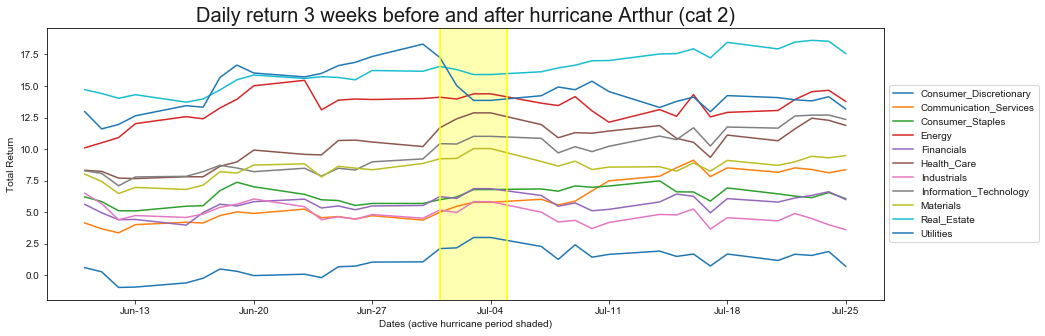

In [16]:
# Arthur
#calculate 21 days before Active date and 21 days after End date to set as x-axis range
hurricanes_art= hurricanes.set_index('Name')
start_date_arthur = hurricanes_art.loc["Arthur", "Active_date"]
end_date_arthur = hurricanes_art.loc["Arthur", "End_date"]

#set 3 week delta for x min and max
x_min_art= start_date_arthur - timedelta(days=21)
x_min_art = x_min_art.strftime('%m/%d/%Y')

x_max_art= end_date_arthur + timedelta(days=21)
x_max_art = x_max_art.strftime('%m/%d/%Y')

#plot for those dates for a chart called Arthur
hurricane_arthur = sp1500_2014[(sp1500_2014['Date']>= x_min_art)& (sp1500_2014['Date'] <= x_max_art)]

# Plot 11 sectors
fig = plt.figure()
ax = plt.axes()
for x in range(1, 12):
    plt.plot(hurricane_arthur['Date'], hurricane_arthur.iloc[:,x])
    
# Shade area representing Hurricane Arthur 
x_Fmt = DateFormatter("%b-%d")
plt.axvline(start_date_arthur, color='yellow')
plt.axvline(end_date_arthur, color='yellow')

ax.xaxis.set_major_formatter(x_Fmt)
ax.axvspan(start_date_arthur, end_date_arthur, alpha=0.3, color='yellow')

plt.ylabel('Total Return')
plt.xlabel('Dates (active hurricane period shaded)')
plt.title('Daily return 3 weeks before and after hurricane Arthur (cat 2)', fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.rcParams["figure.figsize"] = (15,5)

#Finesse
sns.set()
plt.show()

### 2016: Hermine, category 1; Matthew, category 5

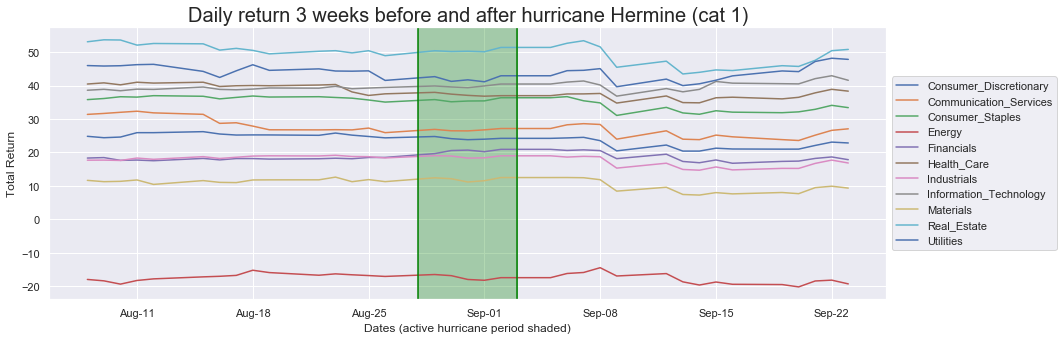

In [17]:
# Hermine
#calculate 21 days before Active date and 21 days after End date to set as x-axis range
hurricanes_her= hurricanes.set_index('Name')
start_date_hermine = hurricanes_her.loc["Hermine", "Active_date"]
end_date_hermine = hurricanes_her.loc["Hermine", "End_date"]

#set 3 week delta for x min and max
x_min_herm= start_date_hermine - timedelta(days=21)
x_min_herm = x_min_herm.strftime('%m/%d/%Y')

x_max_herm= end_date_hermine + timedelta(days=21)
x_max_herm = x_max_herm.strftime('%m/%d/%Y')

#plot for those dates for a chart called Hermine
hurricane_hermine = sp1500_2016[(sp1500_2016['Date']>= x_min_herm)& (sp1500_2016['Date'] <= x_max_herm)]

# Plot 11 sectors
fig = plt.figure()
ax = plt.axes()
for x in range(1, 12):
    plt.plot(hurricane_hermine['Date'], hurricane_hermine.iloc[:,x])
    
# Shade area representing Hurricane Hermine 
x_Fmt = DateFormatter("%b-%d")
plt.axvline(start_date_hermine, color='green')
plt.axvline(end_date_hermine, color='green')

ax.xaxis.set_major_formatter(x_Fmt)
ax.axvspan(start_date_hermine, end_date_hermine, alpha=0.3, color='green')

plt.ylabel('Total Return')
plt.xlabel('Dates (active hurricane period shaded)')
plt.title('Daily return 3 weeks before and after hurricane Hermine (cat 1)', fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.rcParams["figure.figsize"] = (15,5)

#Finesse
sns.set()
plt.show()

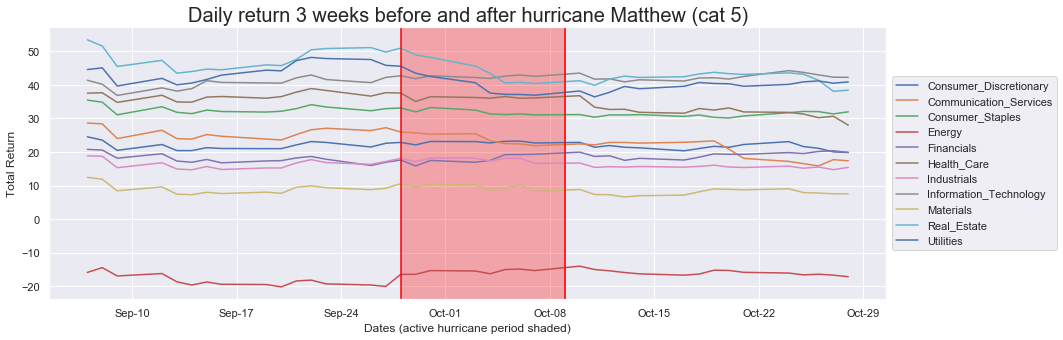

In [18]:
# Matthew
#calculate 21 days before Active date and 21 days after End date to set as x-axis range
hurricanes['Active_date'] = pd.to_datetime(hurricanes['Active_date'])
hurricanes['End_date'] = pd.to_datetime(hurricanes['End_date'])

hurricanes_mat= hurricanes.set_index('Name')
start_date_Mat= hurricanes_mat.loc["Matthew", "Active_date"]
end_date_Mat= hurricanes_mat.loc["Matthew", "End_date"]

#set 3 week delta for x min and max
x_min_M= start_date_Mat - timedelta(days=21)
x_min_M = x_min_M.strftime('%m/%d/%Y')

x_max_M= end_date_Mat + timedelta(days=21)
x_max_M = x_max_M.strftime('%m/%d/%Y')

#plot for those dates for a chart called Matthew
hurricane_matthew = sp1500_2016[(sp1500_2016['Date']>= x_min_M)& (sp1500_2016['Date'] <= x_max_M)]

# Plot 11 sectors
fig = plt.figure()
ax = plt.axes()
for x in range(1, 12):
    plt.plot(hurricane_matthew['Date'], hurricane_matthew.iloc[:,x])

    
# Shade area representing Hurricane Matthew 
x_Fmt = DateFormatter("%b-%d")
plt.axvline(start_date_Mat, color='red')
plt.axvline(end_date_Mat, color='red')

ax.xaxis.set_major_formatter(x_Fmt)
ax.axvspan(start_date_Mat, end_date_Mat, alpha=0.3, color='red')

plt.ylabel('Total Return')
plt.xlabel('Dates (active hurricane period shaded)')
plt.title('Daily return 3 weeks before and after hurricane Matthew (cat 5)', fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.rcParams["figure.figsize"] = (15,5)

#Finesse
sns.set()
plt.show()

### 2017: Harvey, category 4; Irma, category 5; Nate category 1

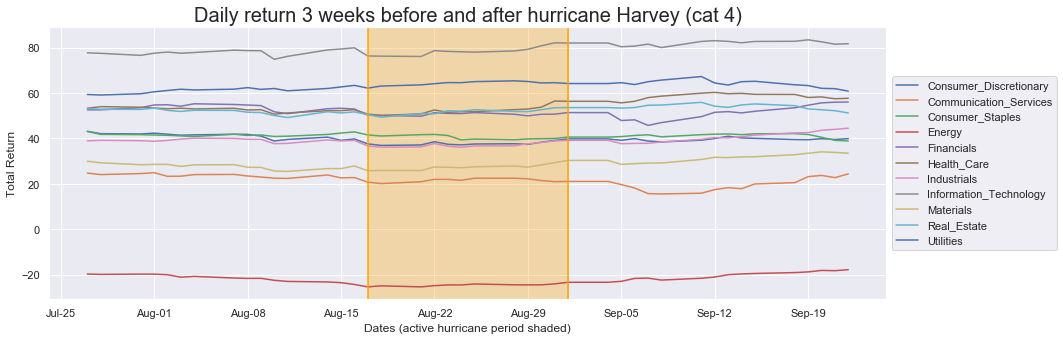

In [19]:
# Harvey
#calculate 21 days before Active date and 21 days after End date to set as x-axis range
hurricanes_har= hurricanes.set_index('Name')
start_date_har= hurricanes_har.loc["Harvey", "Active_date"]
end_date_har= hurricanes_har.loc["Harvey", "End_date"]

#set 3 week delta for x min and max
x_min_har= start_date_har - timedelta(days=21)
x_min_har = x_min_har.strftime('%m/%d/%Y')

x_max_har = end_date_har + timedelta(days=21)
x_max_har = x_max_har.strftime('%m/%d/%Y')

#plot for those dates for a chart called Harvey
hurricane_harvey = sp1500_2017[(sp1500_2017['Date']>= x_min_har)& (sp1500_2017['Date'] <= x_max_har)]

# Plot 11 sectors
fig = plt.figure()
ax = plt.axes()
for x in range(1, 12):
    plt.plot(hurricane_harvey['Date'], hurricane_harvey.iloc[:,x])

    
# Shade area representing Hurricane Harvey 
x_Fmt = DateFormatter("%b-%d")
plt.axvline(start_date_har, color='orange')
plt.axvline(end_date_har, color='orange')

ax.xaxis.set_major_formatter(x_Fmt)
ax.axvspan(start_date_har, end_date_har, alpha=0.3, color='orange')

plt.ylabel('Total Return')
plt.xlabel('Dates (active hurricane period shaded)')
plt.title('Daily return 3 weeks before and after hurricane Harvey (cat 4)', fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.rcParams["figure.figsize"] = (15,5)

#Finesse
sns.set()
plt.show()

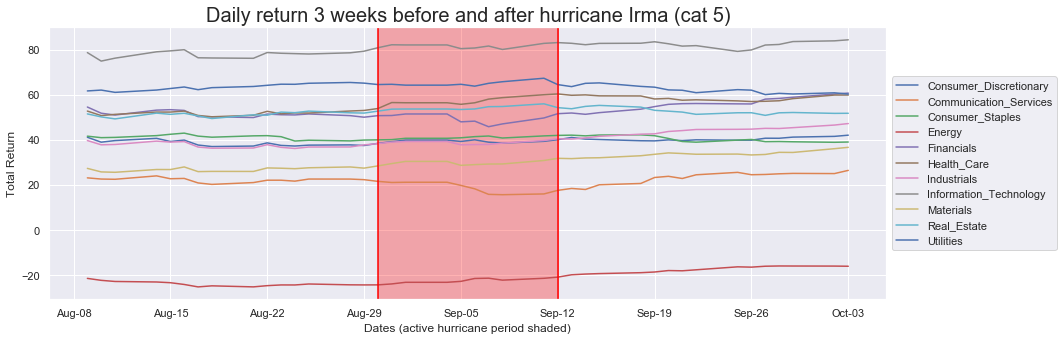

In [20]:
# Irma
#calculate 21 days before Active date and 21 days after End date to set as x-axis range
hurricanes_irma= hurricanes.set_index('Name')
start_date_irma= hurricanes_irma.loc["Irma", "Active_date"]
end_date_irma= hurricanes_irma.loc["Irma", "End_date"]

#set 3 week delta for x min and max
x_min_irma= start_date_irma - timedelta(days=21)
x_min_irma = x_min_irma.strftime('%m/%d/%Y')

x_max_irma = end_date_irma + timedelta(days=21)
x_max_irma = x_max_irma.strftime('%m/%d/%Y')

#plot for those dates for a chart called Harvey
hurricane_irma = sp1500_2017[(sp1500_2017['Date']>= x_min_irma)& (sp1500_2017['Date'] <= x_max_irma)]

# Plot 11 sectors
fig = plt.figure()
ax = plt.axes()
for x in range(1, 12):
    plt.plot(hurricane_irma['Date'], hurricane_irma.iloc[:,x])

    
# Shade area representing Hurricane Irma 
x_Fmt = DateFormatter("%b-%d")
plt.axvline(start_date_irma, color='red')
plt.axvline(end_date_irma, color='red')

ax.xaxis.set_major_formatter(x_Fmt)
ax.axvspan(start_date_irma, end_date_irma, alpha=0.3, color='red')

plt.ylabel('Total Return')
plt.xlabel('Dates (active hurricane period shaded)')
plt.title('Daily return 3 weeks before and after hurricane Irma (cat 5)', fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.rcParams["figure.figsize"] = (15,5)

#Finesse
sns.set()
plt.show()

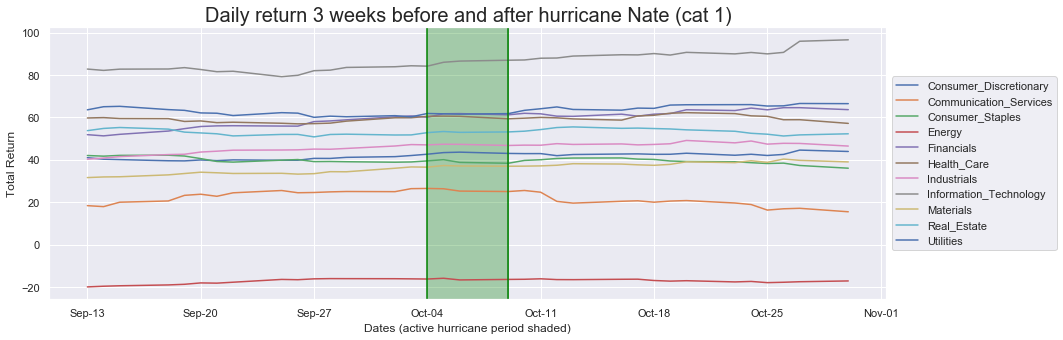

In [21]:
# Nate
#calculate 21 days before Active date and 21 days after End date to set as x-axis range
hurricanes_nate= hurricanes.set_index('Name')
start_date_nate= hurricanes_nate.loc["Nate", "Active_date"]
end_date_nate= hurricanes_nate.loc["Nate", "End_date"]

#set 3 week delta for x min and max
x_min_nate= start_date_nate - timedelta(days=21)
x_min_nate = x_min_nate.strftime('%m/%d/%Y')

x_max_nate = end_date_nate + timedelta(days=21)
x_max_nate = x_max_nate.strftime('%m/%d/%Y')

#plot for those dates for a chart called Harvey
hurricane_nate = sp1500_2017[(sp1500_2017['Date']>= x_min_nate)& (sp1500_2017['Date'] <= x_max_nate)]

# Plot 11 sectors
fig = plt.figure()
ax = plt.axes()
for x in range(1, 12):
    plt.plot(hurricane_nate['Date'], hurricane_nate.iloc[:,x])

    
# Shade area representing Hurricane Nate 
x_Fmt = DateFormatter("%b-%d")
plt.axvline(start_date_nate, color='green')
plt.axvline(end_date_nate, color='green')

ax.xaxis.set_major_formatter(x_Fmt)
ax.axvspan(start_date_nate, end_date_nate, alpha=0.3, color='green')

plt.ylabel('Total Return')
plt.xlabel('Dates (active hurricane period shaded)')
plt.title('Daily return 3 weeks before and after hurricane Nate (cat 1)', fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.rcParams["figure.figsize"] = (15,5)

#Finesse
sns.set()
plt.show()

## 2018: Chris, category 2; Florence, category 4; Michael category 4

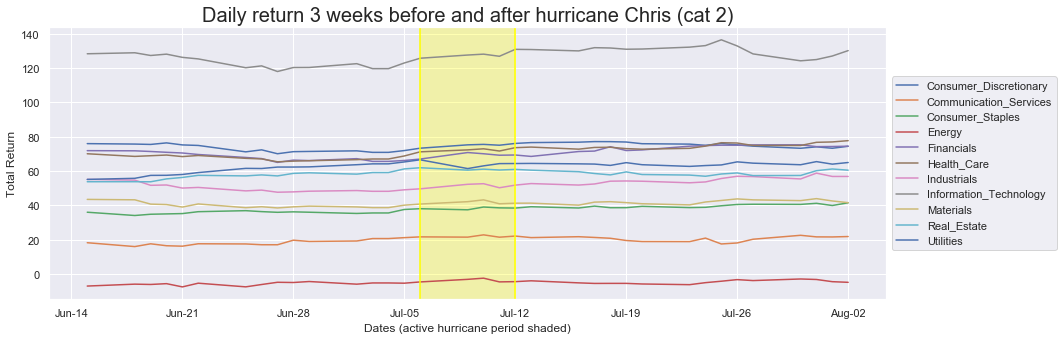

In [22]:
# Chris
#calculate 21 days before Active date and 21 days after End date to set as x-axis range
hurricanes_chris= hurricanes.set_index('Name')
start_date_chris= hurricanes_chris.loc["Chris", "Active_date"]
end_date_chris= hurricanes_chris.loc["Chris", "End_date"]

#set 3 week delta for x min and max
x_min_chris= start_date_chris - timedelta(days=21)
x_min_chris = x_min_chris.strftime('%m/%d/%Y')

x_max_chris = end_date_chris + timedelta(days=21)
x_max_chris = x_max_chris.strftime('%m/%d/%Y')

#plot for those dates for a chart called Chris
hurricane_chris = sp1500_2018[(sp1500_2018['Date']>= x_min_chris)& (sp1500_2018['Date'] <= x_max_chris)]

# Plot 11 sectors
fig = plt.figure()
ax = plt.axes()
for x in range(1, 12):
    plt.plot(hurricane_chris['Date'], hurricane_chris.iloc[:,x])

    
# Shade area representing Hurricane Chris 
x_Fmt = DateFormatter("%b-%d")
plt.axvline(start_date_chris, color='yellow')
plt.axvline(end_date_chris, color='yellow')

ax.xaxis.set_major_formatter(x_Fmt)
ax.axvspan(start_date_chris, end_date_chris, alpha=0.3, color='yellow')

plt.ylabel('Total Return')
plt.xlabel('Dates (active hurricane period shaded)')
plt.title('Daily return 3 weeks before and after hurricane Chris (cat 2)', fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.rcParams["figure.figsize"] = (15,5)

#Finesse
sns.set()
plt.show()

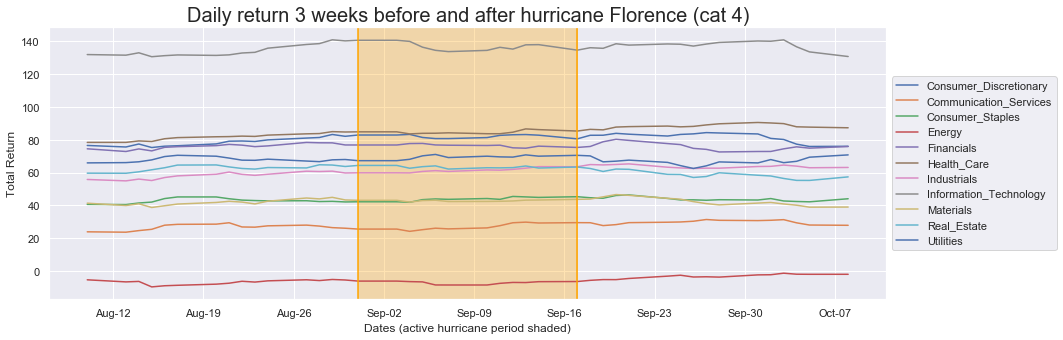

In [23]:
# Florence
#calculate 21 days before Active date and 21 days after End date to set as x-axis range
hurricanes_florence= hurricanes.set_index('Name')
start_date_flor= hurricanes_florence.loc["Florence", "Active_date"]
end_date_flor= hurricanes_florence.loc["Florence", "End_date"]

#set 3 week delta for x min and max
x_min_flor= start_date_flor - timedelta(days=21)
x_min_flor = x_min_flor.strftime('%m/%d/%Y')

x_max_flor = end_date_flor + timedelta(days=21)
x_max_flor = x_max_flor.strftime('%m/%d/%Y')

#plot for those dates for a chart called Chris
hurricane_florence = sp1500_2018[(sp1500_2018['Date']>= x_min_flor)& (sp1500_2018['Date'] <= x_max_flor)]

# Plot 11 sectors
fig = plt.figure()
ax = plt.axes()
for x in range(1, 12):
    plt.plot(hurricane_florence['Date'], hurricane_florence.iloc[:,x])

    
# Shade area representing Hurricane Florence
x_Fmt = DateFormatter("%b-%d")
plt.axvline(start_date_flor, color='orange')
plt.axvline(end_date_flor, color='orange')

ax.xaxis.set_major_formatter(x_Fmt)
ax.axvspan(start_date_flor, end_date_flor, alpha=0.3, color='orange')

plt.ylabel('Total Return')
plt.xlabel('Dates (active hurricane period shaded)')
plt.title('Daily return 3 weeks before and after hurricane Florence (cat 4)', fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.rcParams["figure.figsize"] = (15,5)

#Finesse
sns.set()
plt.show()

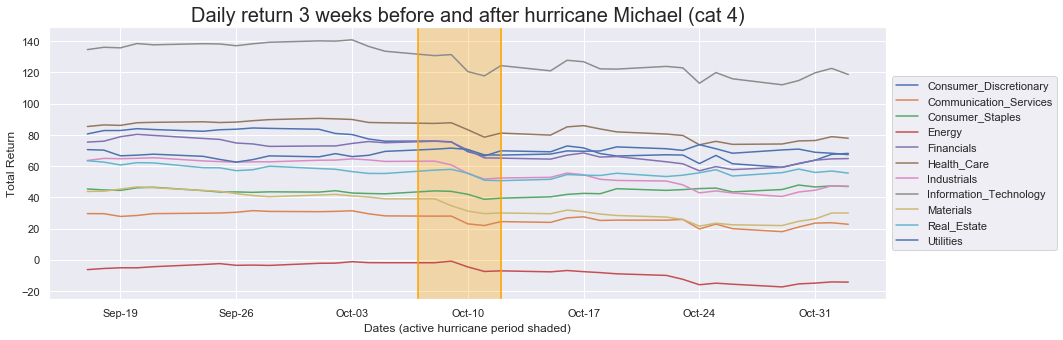

In [24]:
# Michael
#calculate 21 days before Active date and 21 days after End date to set as x-axis range
hurricanes_michael= hurricanes.set_index('Name')
start_date_michael= hurricanes_michael.loc["Michael", "Active_date"]
end_date_michael= hurricanes_michael.loc["Michael", "End_date"]

#set 3 week delta for x min and max
x_min_michael= start_date_michael - timedelta(days=21)
x_min_michael = x_min_michael.strftime('%m/%d/%Y')

x_max_michael = end_date_michael + timedelta(days=21)
x_max_michael = x_max_michael.strftime('%m/%d/%Y')

#plot for those dates for a chart called Chris
hurricane_michael = sp1500_2018[(sp1500_2018['Date']>= x_min_michael)& (sp1500_2018['Date'] <= x_max_michael)]

# Plot 11 sectors
fig = plt.figure()
ax = plt.axes()
for x in range(1, 12):
    plt.plot(hurricane_michael['Date'], hurricane_michael.iloc[:,x])

    
# Shade area representing Hurricane Michael
x_Fmt = DateFormatter("%b-%d")
plt.axvline(start_date_michael, color='orange')
plt.axvline(end_date_michael, color='orange')

ax.xaxis.set_major_formatter(x_Fmt)
ax.axvspan(start_date_michael, end_date_michael, alpha=0.3, color='orange')

plt.ylabel('Total Return')
plt.xlabel('Dates (active hurricane period shaded)')
plt.title('Daily return 3 weeks before and after hurricane Michael (cat 4)', fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.rcParams["figure.figsize"] = (15,5)

#Finesse
sns.set()
plt.show()

## Hypothesis Testing

### Methodology:
To analyze if there was an effect on the stock market when a hurricane occurs, we ran a t-test comapring the means of the same timeframe (one from the actual hurricane, the other mean from the same period in 2015, a year with zero hurricanes). Then, an 2 independent sample t-test was conducted to determine if the two means were statistically significant from each other.
Hurricanes that were statistically significant:
- Hurricane Aurthur (2016, Category 2)
- Hurricane Harvey (2017, Category 4)
- Hurricane Irma (2017, Category 5)
- Hurricane Nate (2017, Category 1)
- Hurricane Chris (2018, Category 2)
- Hurricane Florence 2018, Category 4)
- Hurricane Michael (2018, Category 4)

Hurricanes that were not statistically significant:
- Hurricane Hermine (2016, Category 1)
- Hurricane Matthew (2016, Category 5)

Perform T-Tests
Null Hypothesis: Hurricanes do not have an effect on the stock market (Ho: mu1 - mu2 = 0)
Alternative Hypothesis: Hurricanes have a negative effect on the stock market. (Ha: mu1 < mu2)

In [25]:
#first add a column that averages all of the sector values together so that will be the column to analyze

sp1500['Avg All Sectors'] = sp1500.mean(axis=1)

sp1500.head()

,Date,Consumer_Discretionary,Communication_Services,Consumer_Staples,Energy,Financials,Health_Care,Industrials,Information_Technology,Materials,Real_Estate,Utilities,Avg All Sectors
0,2013-12-30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000
1,2013-12-31,0.37,-0.08,-0.03,0.92,0.34,0.00,0.43,0.71,0.26,-0.49,0.23,0.241818
2,2014-01-01,0.37,-0.08,-0.03,0.92,0.34,0.00,0.43,0.71,0.26,-0.49,0.23,0.241818
3,2014-01-02,-0.16,-0.68,-1.12,-0.44,-0.23,-0.58,-0.87,-0.36,-0.48,-0.66,-1.34,-0.629091
4,2014-01-03,-0.35,-1.31,-1.27,-0.69,0.39,-0.35,-0.55,-0.71,-0.58,0.02,-1.57,-0.633636


### Hurricane Arthur, category 2

In [26]:
# Arthur ttest data
hurricane_arthur_ttest = sp1500[(sp1500['Date']>= x_min_art)& (sp1500['Date'] <= x_max_art)]

# Add avg all sectors to 2015 control for arthur
sp1500_arthur['Avg All Sectors'] = sp1500_arthur.mean(axis=1)

# run t-test
(ttest, p) = scipy.stats.ttest_ind(hurricane_arthur_ttest['Avg All Sectors'], sp1500_arthur['Avg All Sectors'])

if p < 0.05:
    print("The differences are significant.", p)
else:
    print("The differences between are due to chance.", p)


The differences are significant. 1.6636427012809893e-37


### Hurricane Hermine, category 1

In [27]:
# Hermine ttest
hurricane_hermine_ttest = sp1500[(sp1500['Date']>= x_min_herm)& (sp1500['Date'] <= x_max_herm)]

# Add avg all sectors for hermine 2015 control
sp1500_hermine['Avg All Sectors'] = sp1500_hermine.mean(axis=1)

#run t-test
(ttest, p) = scipy.stats.ttest_ind(hurricane_hermine_ttest['Avg All Sectors'], sp1500_hermine['Avg All Sectors'])

if p < 0.05:
    print("The differences are significant.", p)
else:
    print("The differences between are due to chance.", p)

The differences are significant. 1.8580317551628005e-24


### Hurricane Matthew, category 5

In [28]:
# Matthew ttest
hurricane_matthew_ttest = sp1500[(sp1500['Date']>= x_min_M)& (sp1500['Date'] <= x_max_M)]

# Add avg all sectors for matthew 2015 control
sp1500_matthew['Avg All Sectors'] = sp1500_matthew.mean(axis=1)

#run t-test
(ttest, p) = scipy.stats.ttest_ind(hurricane_matthew_ttest['Avg All Sectors'], sp1500_matthew['Avg All Sectors'])

if p < 0.05:
    print("The differences are significant.", p)
else:
    print("The differences between are due to chance.", p)

The differences are significant. 5.73613043667607e-39


### Hurricane Harvey, category 4

In [29]:
# Harvey ttest
hurricane_harvey_ttest = sp1500[(sp1500['Date']>= x_min_har)& (sp1500['Date'] <= x_max_har)]

# Add avg all sectors for Harvey 2015 control
sp1500_harvey['Avg All Sectors'] = sp1500_harvey.mean(axis=1)

# run ttest
(ttest, p) = scipy.stats.ttest_ind(hurricane_harvey_ttest['Avg All Sectors'], sp1500_harvey['Avg All Sectors'])

if p < 0.05:
    print("The differences are significant.", p)
else:
    print("The differences between are due to chance.", p)

The differences are significant. 2.0237412514233564e-61


### Hurricane Irma, category 5

In [30]:
# Irma ttest
hurricane_irma_ttest = sp1500[(sp1500['Date']>= x_min_irma)& (sp1500['Date'] <= x_max_irma)]

# Add avg all sectors for Irma 2015 control
sp1500_irma['Avg All Sectors'] = sp1500_irma.mean(axis=1)

# run ttest
(ttest, p) = scipy.stats.ttest_ind(hurricane_irma_ttest['Avg All Sectors'], sp1500_irma['Avg All Sectors'])

if p < 0.05:
    print("The differences are significant.", p)
else:
    print("The differences between are due to chance.", p)

The differences are significant. 2.7867516695780473e-62


### Hurricane Nate, category 1

In [31]:
# Nate ttest
hurricane_nate_ttest = sp1500[(sp1500['Date']>= x_min_nate)& (sp1500['Date'] <= x_max_nate)]

#Add avg all sectors for Nate 2015 control
sp1500_nate['Avg All Sectors'] = sp1500_nate.mean(axis=1)

# run ttest
(ttest, p) = scipy.stats.ttest_ind(hurricane_nate_ttest['Avg All Sectors'], sp1500_nate['Avg All Sectors'])

if p < 0.05:
    print("The differences are significant.", p)
else:
    print("The differences between are due to chance.",p)

The differences are significant. 3.987174173771928e-59


### Hurricane Chris, category 2

In [32]:
# Chris ttest
hurricane_chris_ttest = sp1500[(sp1500['Date']>= x_min_chris)& (sp1500['Date'] <= x_max_chris)]

# Add avg all sectors for Chris 2015 control
sp1500_chris['Avg All Sectors'] = sp1500_chris.mean(axis=1)

# run ttest
(ttest, p) = scipy.stats.ttest_ind(hurricane_chris_ttest['Avg All Sectors'], sp1500_chris['Avg All Sectors'])

if p < 0.05:
    print("The differences are significant.", p)
else:
    print("The differences between are due to chance.", p)

The differences are significant. 1.0945510935425884e-76


### Hurricane Florence, category 4

In [33]:
# Florence ttest
hurricane_florence_ttest = sp1500[(sp1500['Date']>= x_min_flor)& (sp1500['Date'] <= x_max_flor)]

# Add avg all sectors for Florence 2015 control
sp1500_florence['Avg All Sectors'] = sp1500_florence.mean(axis=1)

# run ttest
(ttest, p) = scipy.stats.ttest_ind(hurricane_florence_ttest['Avg All Sectors'], sp1500_florence['Avg All Sectors'])

if p < 0.05:
    print("The differences are significant.", p)
else:
    print("The differences between are due to chance.", p)

The differences are significant. 2.09232889660908e-86


### Hurricane Michael, category 4

In [34]:
# Michael ttest
hurricane_michael_ttest = sp1500[(sp1500['Date']>= x_min_michael)& (sp1500['Date'] <= x_max_michael)]

# Add avg all sectors for Michael 2015 control
sp1500_michael['Avg All Sectors'] = sp1500_michael.mean(axis=1)

# run ttest
(ttest, p) = scipy.stats.ttest_ind(hurricane_michael_ttest['Avg All Sectors'], sp1500_michael['Avg All Sectors'])

if p < 0.05:
    print("The differences are significant.", p)
else:
    print("The differences between are due to chance.", p)

The differences are significant. 9.653905778241775e-51
